### Notebook setup

#### Import shunpiker pre-set packages and modules
 
For an introduction to python packages and modules, see https://realpython.com/python-modules-packages/#python-packages.    

In [1]:
# import shunpiker pre-set packages and modules
%run shunpiker_modules.py

scanpy==1.8.2 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5
phenograph== 1.5.7


💡 **Hint:** Use the code below ONLY if you need to install extra packages

In [2]:
#import sys
#!{sys.executable} -m pip install watermark

#### Set notebook parameters

[`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) sets output of plotting commands to be displayed directly below the code cell that produced it.


<a id='part_1'></a>

In [3]:
# display plot directly below code cell
%matplotlib inline

In [3]:
path_to_h5ad = '/home/kousaa/scRNAseq-analysis/[AK011] Hana_unconvencional-Tcells/notebooks/files/Vd2.h5ad'

In [4]:
adata = sc.read_h5ad(path_to_h5ad)

In [5]:
adata.shape

(19674, 18957)

In [6]:
adata.obs['status'] = ['healthy' if 'healthy' in x else 'patient' if 'patient' in x else 'ERROR' for x in adata.obs['sample']]

In [7]:
adata.uns['status_colors'] = ['#B4C540', '#842D73']

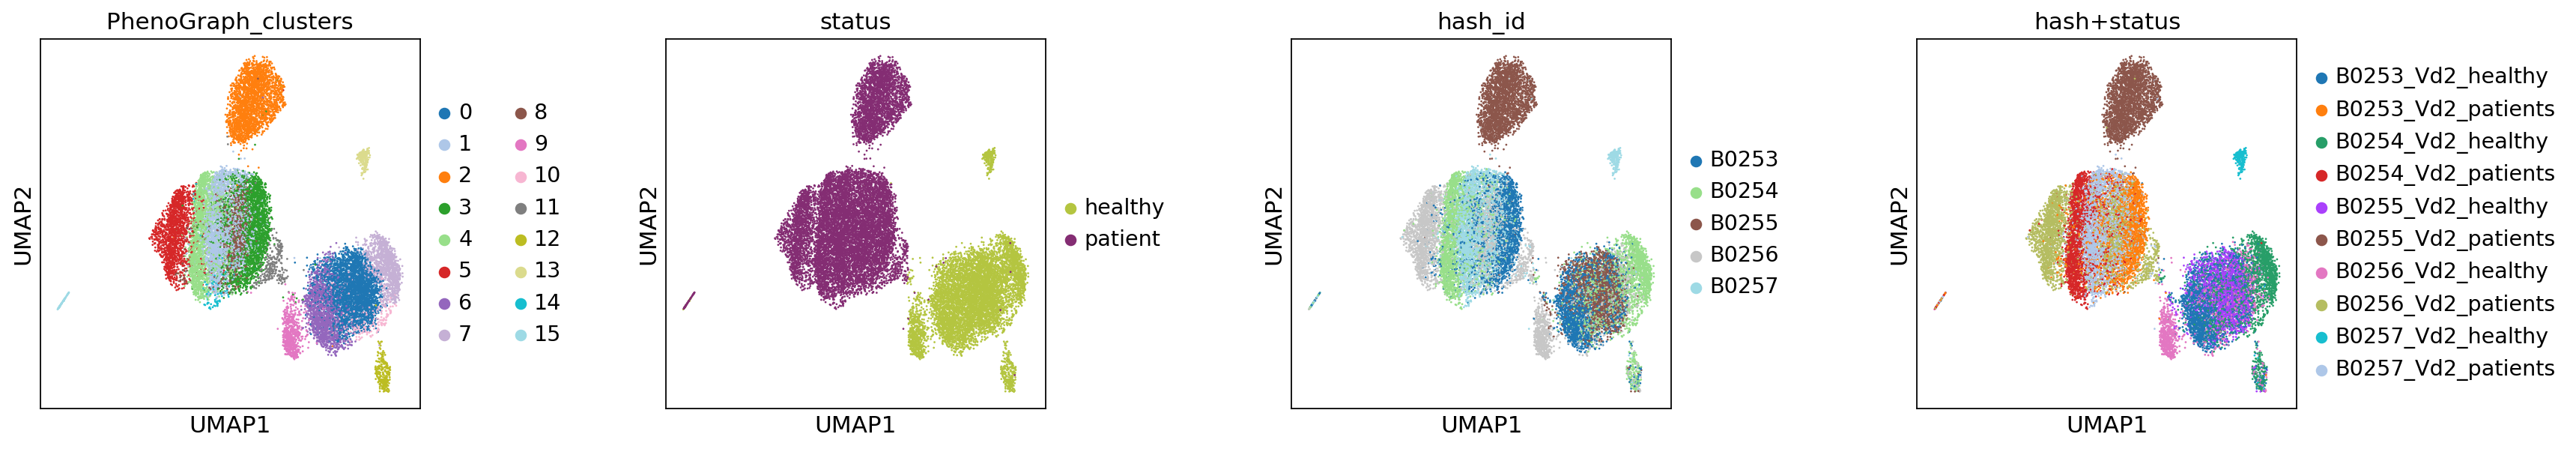

In [11]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata, 
    color=['PhenoGraph_clusters', 'status', 'hash_id', 'hash+status'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.5,
    sort_order = False
)

In [12]:
adata_clean = adata[adata.obs['PhenoGraph_clusters']!=15]

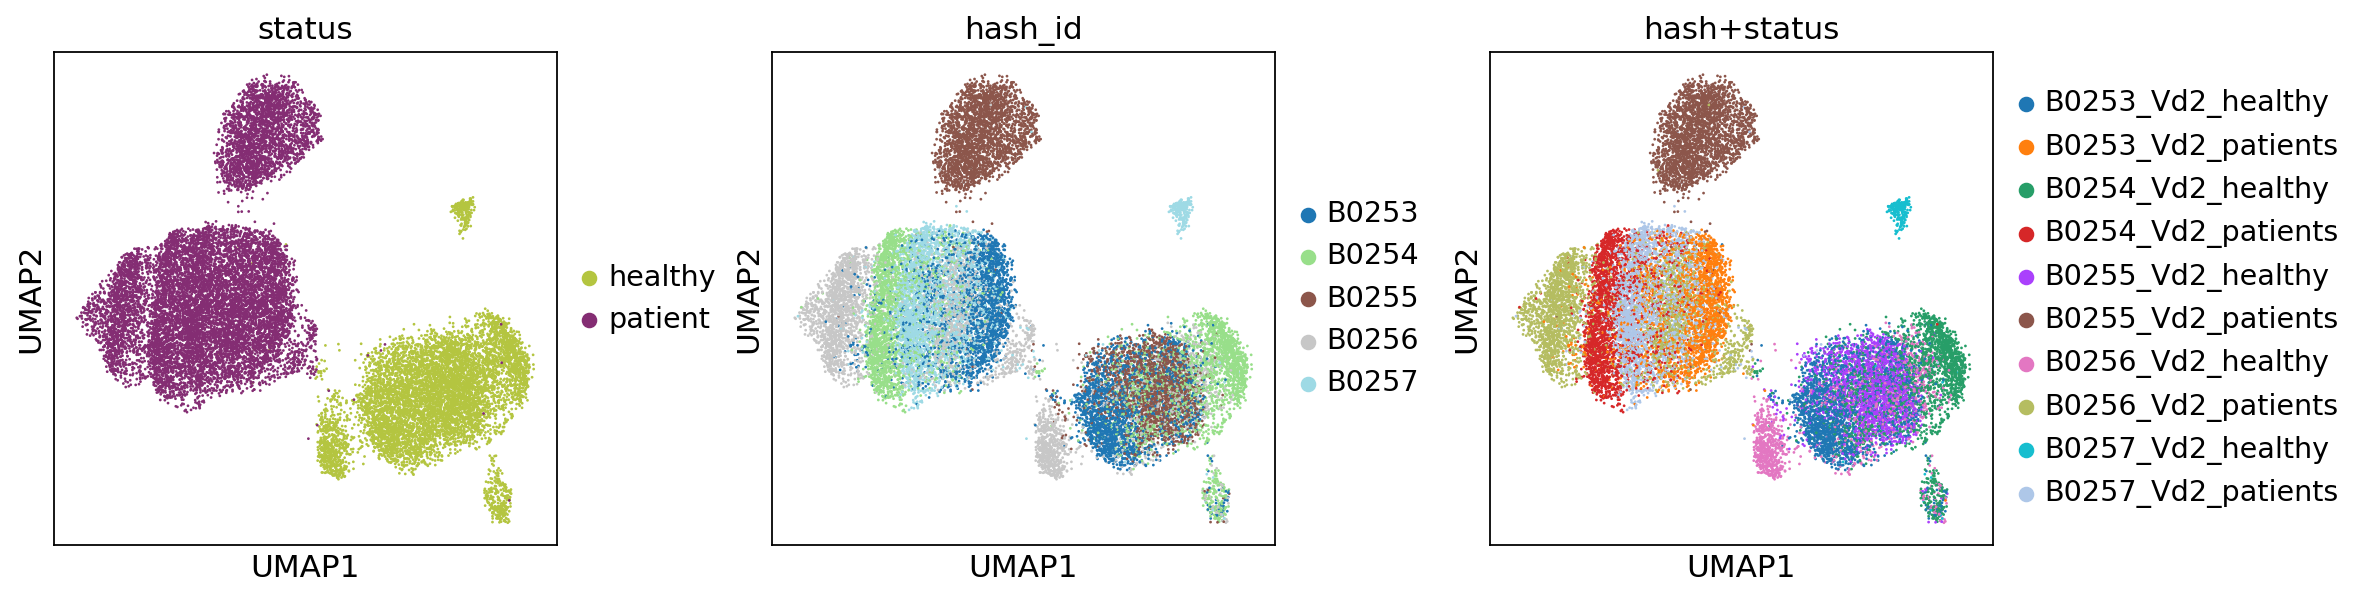

In [13]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['status', 'hash_id', 'hash+status'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.3,
    sort_order = False
)

In [14]:
sc.settings.verbosity = 3 

In [15]:
sc.pp.highly_variable_genes(adata_clean, flavor='seurat')

extracting highly variable genes
    finished (0:00:04)


Trying to set attribute `.uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [16]:
rng = np.random.RandomState(42)
adata_clean = sc.tl.pca(adata_clean, n_comps=200, copy = True, svd_solver='arpack', random_state=rng)

computing PCA
    on highly variable genes
    with n_comps=200
    finished (0:00:24)


We can visualize the percentage of variance explained by each PC. Based on this figure, we will select a number of principal components to use in the rest of our analysis. 

<function matplotlib.pyplot.show(close=None, block=None)>

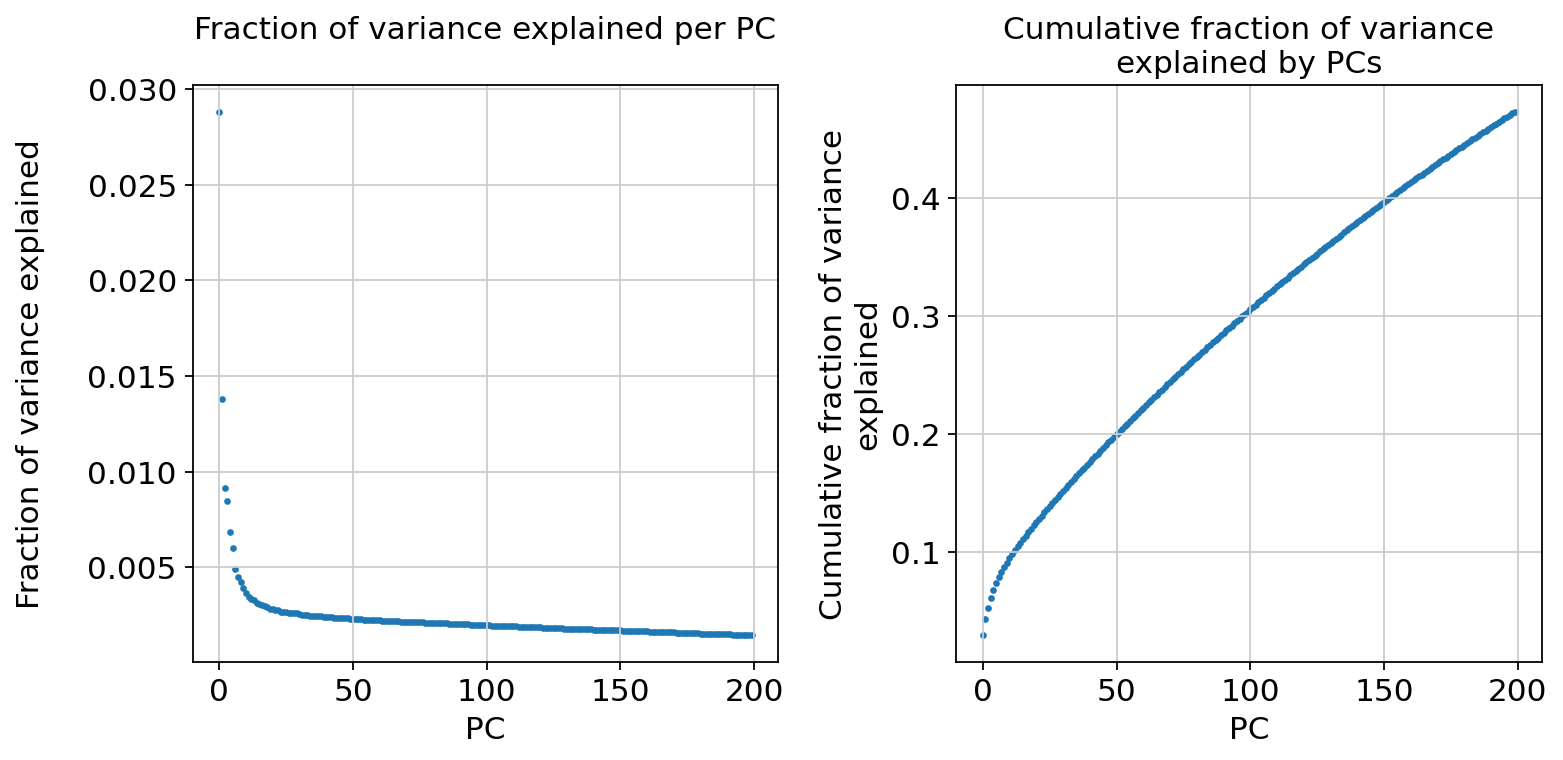

In [17]:
observe_variance(adata_clean)

❗ We want to include all the principal components before the 'knee point' (the point where the fitted curve would change slope the most), because these likely represent important sources of variance in our data. To try to avoid eliminating any relevant but small sources of variance, we will choose a number of PCs slightly to the right of the knee point. 

Replace the number below with your selection and run PCA again.

In [18]:
rng = np.random.RandomState(42)
sc.tl.pca(adata_clean, n_comps=50, svd_solver='arpack', random_state=rng)
sc.pp.neighbors(adata_clean, n_neighbors=15)
sc.tl.umap(adata_clean)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:14)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:36)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:47)


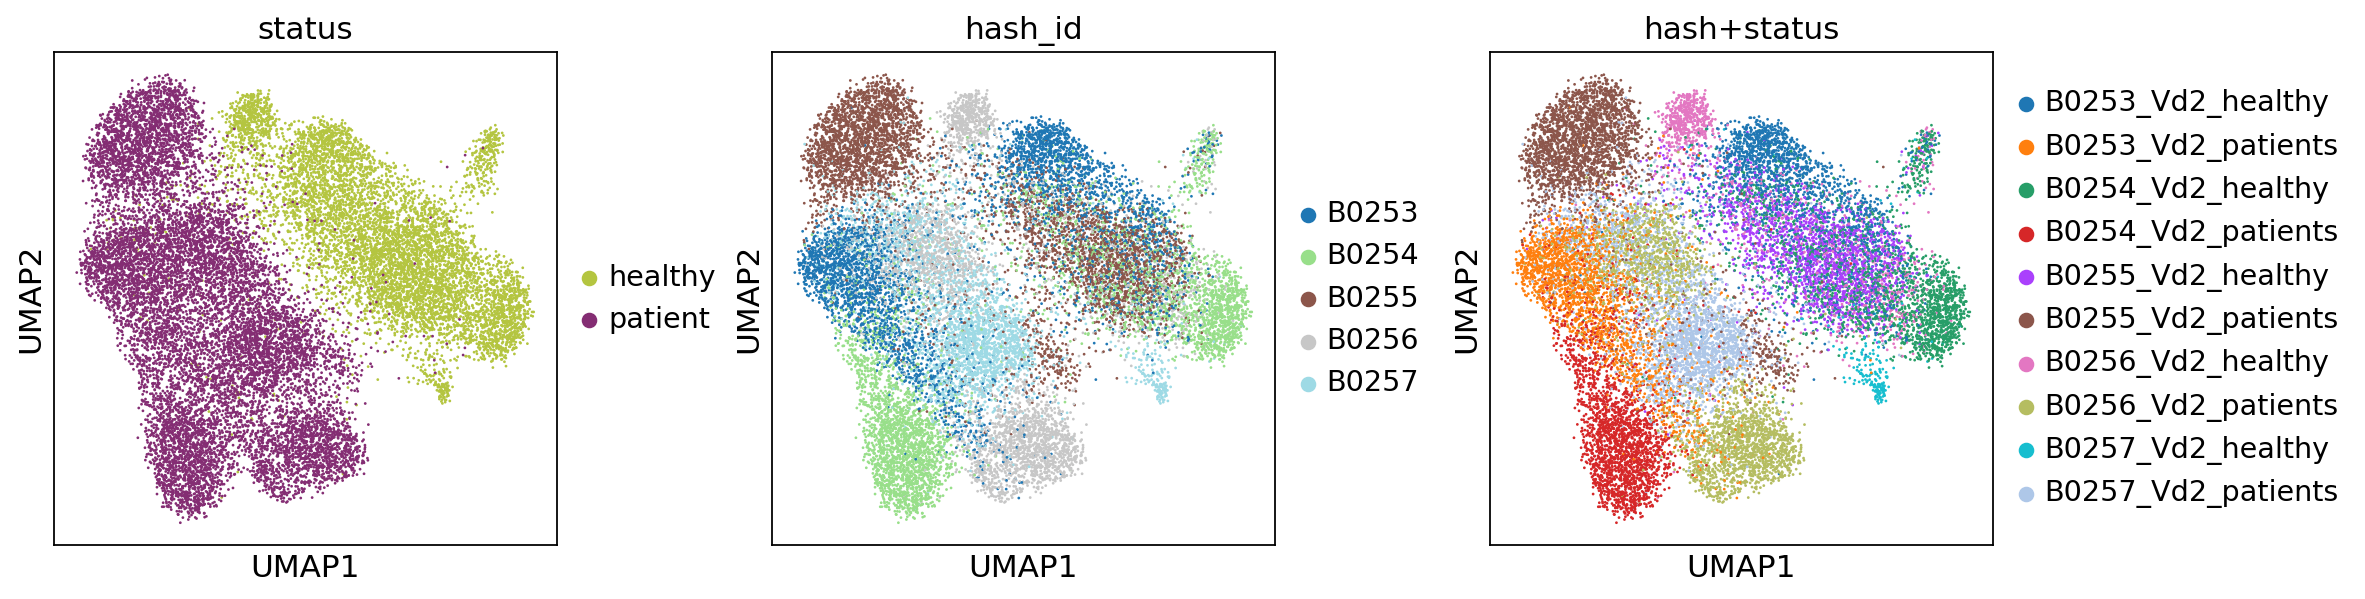

In [19]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['status', 'hash_id', 'hash+status'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.3,
    sort_order = False
)

### Unsupervised clustering analysis using PhenoGraph

In [97]:
# calculate clustering characteristics for a range of ks (5 to 155), by a step of 5.
ks = np.arange(5,155,5)
cluster_chars = [calc_clustering_characteristics(k, adata_clean.obsm['X_pca']) for k in ks];

Finding 5 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 17.75538420677185 seconds
Jaccard graph constructed in 6.47717547416687 seconds
Wrote graph to binary file in 0.023658037185668945 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.935171
Louvain completed 21 runs in 9.40288519859314 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 38.192665576934814 seconds
Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 13.085510730743408 seconds
Jaccard graph constructed in 7.694835424423218 seconds
Wrote graph to binary file in 0.09941387176513672 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.814168
After 18 runs, maximum modularity is Q = 0.815367
Louvain completed 38 runs in 14.335796117782593 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 39.47949814796448 seconds
Fin

Wrote graph to binary file in 2.999513626098633 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.723561
After 2 runs, maximum modularity is Q = 0.727158
Louvain completed 22 runs in 46.126399517059326 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 187.37498116493225 seconds
Finding 90 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 27.963862657546997 seconds
Jaccard graph constructed in 89.05886363983154 seconds
Wrote graph to binary file in 3.4997620582580566 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.725474
Louvain completed 21 runs in 84.4547369480133 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 212.29041028022766 seconds
Finding 95 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 23.1537606716156 seconds
Jaccard graph constructed in 96.7273964881897 seconds
Wrote g

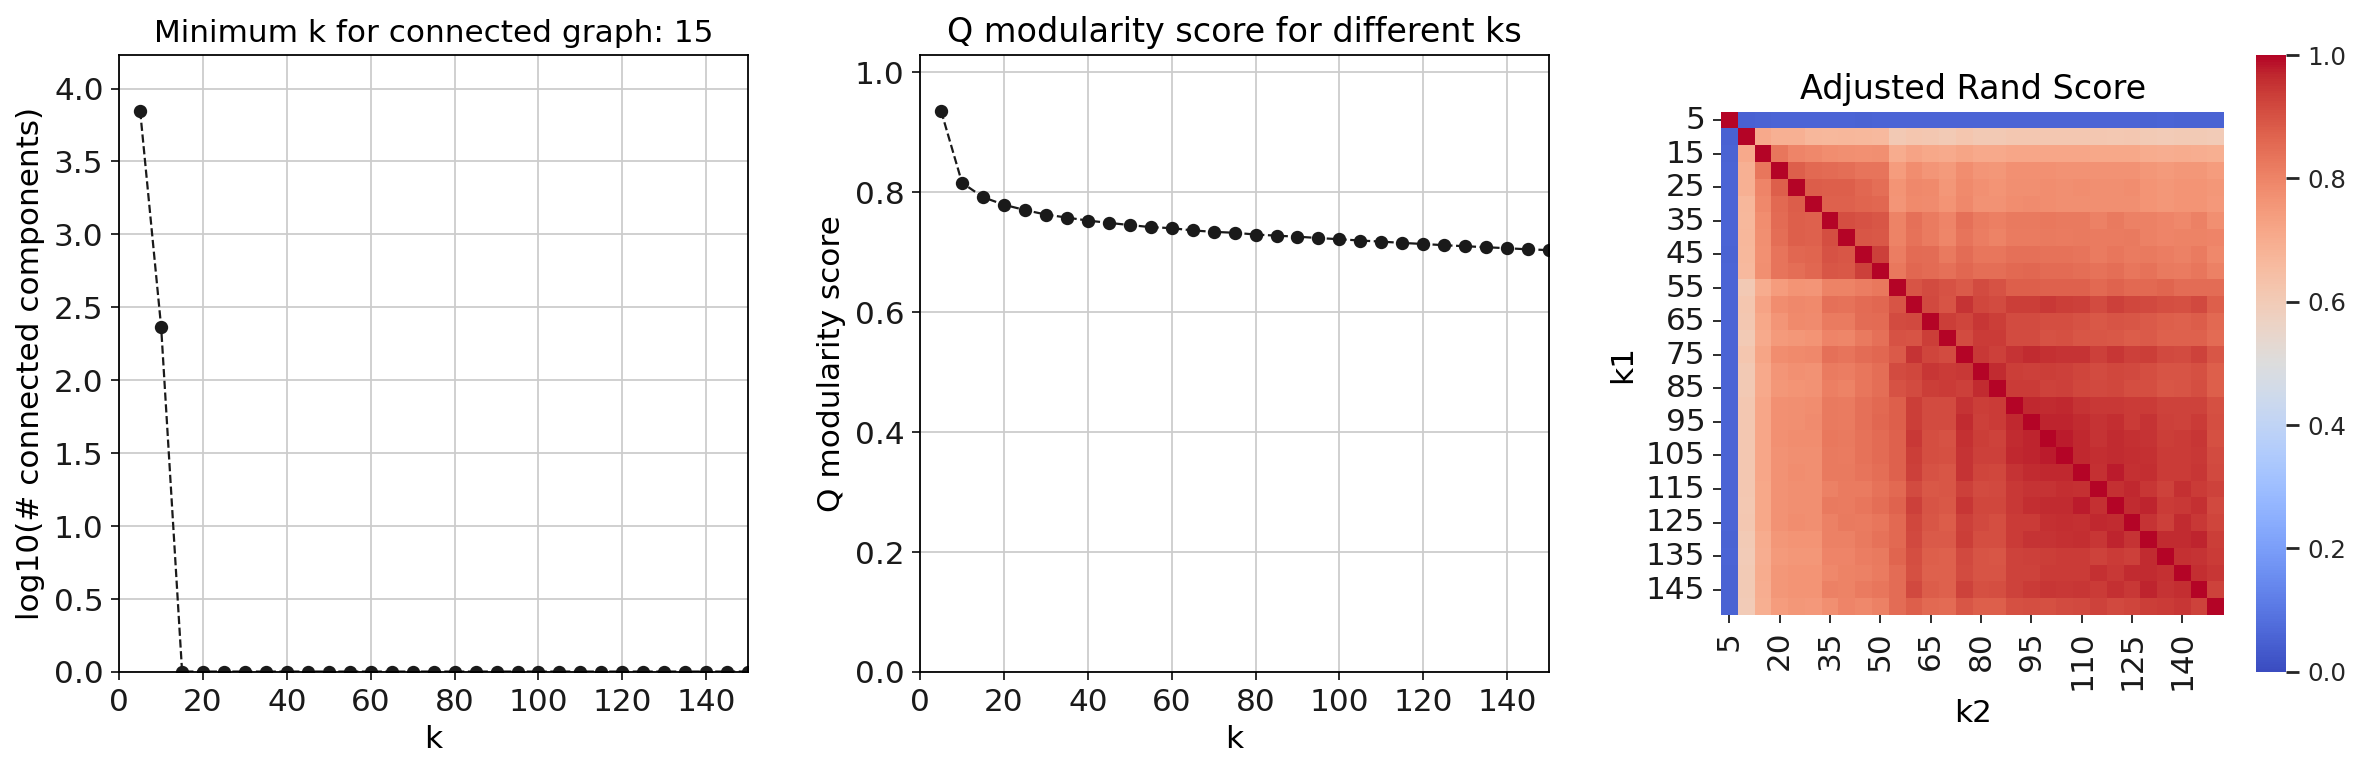

In [98]:
Rand_index_df = inspect_clustering_chars(ks, cluster_chars)

In [99]:
Rand_index_df.iloc[1:13,1:15]

k2,10,15,20,25,30,35,40,45,50,55,60,65,70,75
k1,,,,,,,,,,,,,,
10,1.000000,0.707732,0.690779,0.688349,0.671008,0.664408,0.669873,0.664670,0.660634,0.606497,0.618637,0.614923,0.601934,0.618449
15,0.707732,1.000000,0.830816,0.800425,0.791123,0.777847,0.775705,0.771326,0.774992,0.702569,0.722658,0.711939,0.705345,0.722434
20,0.690779,0.830816,1.000000,0.878411,0.858721,0.852902,0.846314,0.834492,0.834980,0.744807,0.781092,0.760743,0.748670,0.778618
25,0.688349,0.800425,0.878411,1.000000,0.879453,0.875471,0.875209,0.862208,0.845206,0.762550,0.791474,0.786635,0.756369,0.788300
30,0.671008,0.791123,0.858721,0.879453,1.000000,0.872074,0.874139,0.866256,0.860844,0.760354,0.787999,0.781692,0.763230,0.790251
35,0.664408,0.777847,0.852902,0.875471,0.872074,1.000000,0.906918,0.900421,0.892511,0.803232,0.842247,0.817156,0.800489,0.840889
40,0.669873,0.775705,0.846314,0.875209,0.874139,0.906918,1.000000,0.892342,0.886926,0.804542,0.837225,0.819070,0.795808,0.834837
45,0.664670,0.771326,0.834492,0.862208,0.866256,0.900421,0.892342,1.000000,0.932305,0.815793,0.852418,0.848777,0.822804,0.848220
50,0.660634,0.774992,0.834980,0.845206,0.860844,0.892511,0.886926,0.932305,1.000000,0.825243,0.863043,0.853613,0.840396,0.860322


In [22]:
# add your selected k value here to proceed
k=20
communities, graph, Q = sc.external.tl.phenograph(pd.DataFrame(adata_clean.obsm['X_pca']),k=k)
adata_clean.obs['PhenoGraph_clusters'] = pd.Categorical(communities)
adata_clean.uns['PhenoGraph_Q'] = Q
adata_clean.uns['PhenoGraph_k'] = k

PhenoGraph clustering
Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 11.965964078903198 seconds
Jaccard graph constructed in 13.373602867126465 seconds
Wrote graph to binary file in 0.39066338539123535 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.780035
After 12 runs, maximum modularity is Q = 0.781624
After 27 runs, maximum modularity is Q = 0.782731
Louvain completed 47 runs in 29.64402413368225 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 61.36476993560791 seconds
    finished (0:01:01)


We can visualize the clustering to see which clusters match with the cells that we would like to filter out. Inspect the list of QC metrics and canonical markers to make your choice.

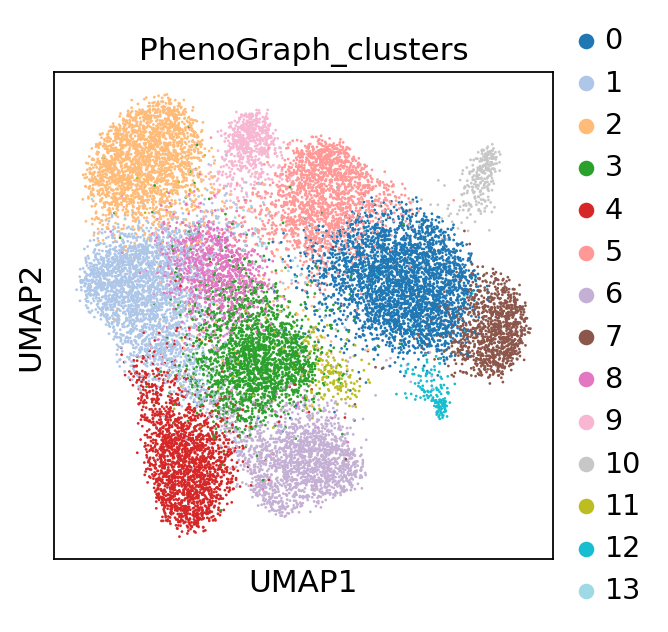

In [23]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['PhenoGraph_clusters'], 
    palette='tab20',  
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.5,
    sort_order = False
)

In [24]:
path_to_h5ad = '/home/kousaa/scRNAseq-analysis/[AK011] Hana_unconvencional-Tcells/notebooks/files/Vd2_clean.h5ad'

In [25]:
adata_clean.write(path_to_h5ad)

In [ ]:
# canonical markers

In [102]:
canonical_markers = ['PTPRC', 'CD3D', 'KLRB1', 'SLC4A10', 'IL7R', 'NKG7', 'RORC', 'CD8A', 'CD4', 'DPP4', 'IFNG', 'GZMB', 'TNF', 'TBX21',
           'NR4A1', 'FOS', 'JUN', 'CD69', 'CCR7',  'SELL', 'CD4', 'LEF1', 'RUNX3', 'IFIT3', 'ISG15', 'METRNL',  'TNFRSF4', 'FOXP3',  'CD68', 'ANPEP', 'SIRPA', 'CLEC10A']

In [26]:
import numpy as np

In [27]:
counts = pd.DataFrame(adata_clean.X)
counts.index = adata_clean.obs.index.values
counts = np.transpose(counts)
counts.index = adata_clean.var.index.values
counts.to_csv('adata_Vd2_counts.txt', sep='\t', header = True, index=True)

In [28]:
counts = np.transpose(counts)
counts.insert(0, 'cell_type', adata_clean.obs['status'])

In [29]:
counts.iloc[:,0].to_csv('adata_Vd2_metadata.txt', sep='\t', header = True, index=True)

Use now generated files to run the differential expression analysis with the R code below.

In [1]:
%load_ext rpy2.ipython

In [2]:
%R if (!require("pacman")) install.packages("pacman")
%R pacman::p_load(MAST, data.table, openxlsx, ggplot2, ggpubr, RColorBrewer, dichromat)

R[write to console]: Loading required package: pacman



1,1,1,...,1,1,1


In [3]:
%R counts = read.csv('adata_Vd2_counts.txt', sep = '\t', row.names=1, header=TRUE)

,X204359620020083.Vd2_healthy,X130615939820381.Vd2_healthy,X195615853590749.Vd2_healthy,X200905105234275.Vd2_healthy,X126912858287003.Vd2_healthy,X204842804303734.Vd2_healthy,X121751112923558.Vd2_healthy,X166265542293237.Vd2_healthy,X196095803549475.Vd2_healthy,X241109193051566.Vd2_healthy,...,X157002339666870.Vd2_patients,X192797300411692.Vd2_patients,X196105452350301.Vd2_patients,X166265510550261.Vd2_patients,X196592958101942.Vd2_patients,X230809907940589.Vd2_patients,X197057056003931.Vd2_patients,X165310985623963.Vd2_patients,X197280172263270.Vd2_patients,X165790514301734.Vd2_patients
A1BG,0.000000,1.760777,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
A1CF,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
A2M,0.000000,0.000000,1.500316,0.0,2.268564,1.630568,2.389453,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,1.967121,1.993861,0.0,0.0,0.0,0.0,1.372358
A2ML1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,1.456921,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
ZYG11B,1.403488,0.000000,1.500316,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
ZYX,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,1.456921,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
ZZEF1,0.000000,0.000000,1.500316,0.0,0.000000,1.630568,0.000000,0.000000,0.0,1.128976,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [4]:
%R meta = read.csv('adata_Vd2_metadata.txt', sep = '\t', row.names=1,  header=TRUE)

,cell_type
204359620020083.Vd2_healthy,healthy
130615939820381.Vd2_healthy,healthy
195615853590749.Vd2_healthy,healthy
200905105234275.Vd2_healthy,healthy
126912858287003.Vd2_healthy,healthy
...,...
230809907940589.Vd2_patients,patient
197057056003931.Vd2_patients,patient
165310985623963.Vd2_patients,patient
197280172263270.Vd2_patients,patient


In [5]:
%R dataset = list(t(counts), meta)
%R names(dataset) <- c("counts", "meta")

'counts','meta'


In [6]:
# load data into MAST object
%R sca <- FromMatrix(t(dataset$counts), dataset$meta) 
%R sca

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 1, with name et is log-transformed.



<rpy2.robjects.methods.RS4 object at 0x2aee52d1ec80> [RTYPES.S4SXP]
R classes: ('SingleCellAssay',)

In [7]:
# calculate and store the cdr per cell
%R cdr2 <-colSums(assay(sca)>0)
%R colData(sca)$cngeneson <- scale(cdr2)

array([[ 1.05597704],
       [-0.89664227],
       [ 0.54309392],
       ...,
       [-0.51930683],
       [-0.27751907],
       [ 0.76656442]])

In [8]:
%R colData(sca)$cell_type = as.factor(colData(sca)$cell_type)

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', ..., 'patient', 'patient', 'patient', 'patient', 'patient']
Length: 19587
Categories (2, object): ['healthy', 'patient']

In [9]:
# check cluster levels
%R levels(colData(sca)$cell_type)

'healthy','patient'


In [10]:
%R DE_list = list()

<rpy2.robjects.vectors.ListVector object at 0x2aee4caf8040> [RTYPES.VECSXP]
R classes: ('list',)
[]

In [11]:
%R step =0;
%R colData(sca)$comparison = colData(sca)$cell_type

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', ..., 'patient', 'patient', 'patient', 'patient', 'patient']
Length: 19587
Categories (2, object): ['healthy', 'patient']

In [12]:
length = %R length(levels(colData(sca)$cell_type))

In [ ]:
%%R for (x in 1:length(levels(colData(sca)$cell_type))){
    #reset the original clusters' order for each run
    colData(sca)$comparison = colData(sca)$cell_type
    #replace levels with the cluster of interest vs REST
    levels(colData(sca)$comparison) = c(rep('REST', step), levels(colData(sca)$comparison)[x] , rep('REST', 2-step))
    #make sure REST is the reference group (denominator)
    comp<-factor(colData(sca)$comparison)
    comp<-relevel(comp,"REST")
    colData(sca)$comparison<-comp
    
    zlmComp <- zlm(~comparison + cngeneson, sca)
    subsetComp = paste('comparison', levels(colData(sca)$comparison)[2], sep="")
    summaryComp <- summary(zlmComp, doLRT=subsetComp) 
    summaryCmp <- summaryComp$datatable
    #hurdle P values
    fcHurdle <- merge(summaryCmp[contrast==subsetComp & component=='H',.(primerid, `Pr(>Chisq)`)], summaryCmp[contrast==subsetComp & component=='logFC', .(primerid, coef, ci.hi, ci.lo)], by='primerid') #logFC coefficients

    fcHurdle[,fdr:=p.adjust(`Pr(>Chisq)`, 'fdr')]
    #fcHurdleSig <- merge(fcHurdle[fdr<.05 & abs(coef)>FCTHRESHOLD], as.data.table(mcols(sca)), by='primerid')
    setorder(fcHurdle, fdr)
    fcHurdle
    DE_list[[x]] = fcHurdle
    
    step=step+1
}

In [ ]:
%R names(DE_list) <- levels(colData(sca)$cell_type)

In [ ]:
%%R for (iterate in 1:length(levels(colData(sca)$cell_type))){ 
        fcHurdle = DE_list[[iterate]]
        fcHurdle_f = fcHurdle[which(fcHurdle$fdr<=0.05),]
        print(fcHurdle_f[order(fcHurdle_f[,-fcHurdle_f$coef])[1:20],])
    }

🕹️ Use the command below to save all comparisons from the differential expression analysis with MAST as an excel document in different sheets.

In [ ]:
%R write.xlsx(DE_list, file = "adata_Vd2_comparison_DGE.xlsx")